<h1>Network Analysis with Python</h1>

<li>Networks are connected bi-directional graphs
<li>Nodes mark the entities in a network
<li>Edges mark the relationships in a network

<h2>Examples of networks</h2>
<li>Facebook friends
<li>Other social networks
<li>transportation networks
<li>Power grids
<li>Internet routers
<li>Activity networks
<li>Many others

<h2>Questions we're interested in</h2>
<li>Shortest path between two nodes
<li>Connectedness
<li>Centrality
<li>Clustering
<li>Communicability

<h1>networkx</h1>
<li>Python package for networks 
<li>Nodes and edges can contain data
<li>Nodes can be (hashable!) python objects

<h3>Constructing a simple network</h3>

<b>Necessary imports</b>

In [5]:
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

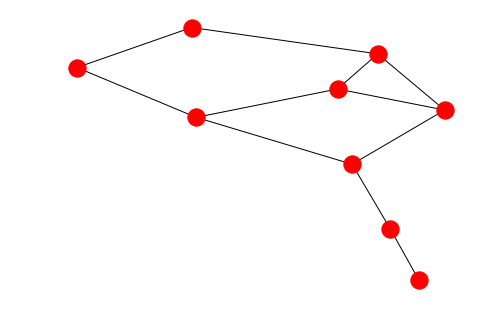

In [6]:
simple_network = nx.Graph()
nodes = [1,2,3,4,5,6,7,8]
edges = [(1,2),(2,3),(1,3),(4,5),(2,7),(1,9),(3,4),(4,5),(4,9),(5,6),(7,8),(8,9)]
simple_network.add_nodes_from(nodes)
simple_network.add_edges_from(edges)
nx.draw(simple_network)

<h1>Add labels to the nodes</h1>

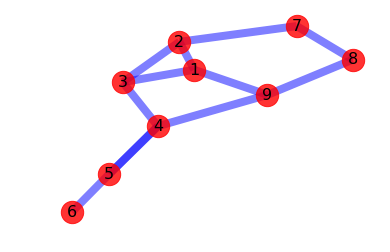

In [7]:
pos=nx.spring_layout(simple_network) # positions for all nodes

# nodes
nx.draw_networkx_nodes(simple_network,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(simple_network,pos,
                       edgelist=edges,
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in simple_network.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(simple_network,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

<h4>Simple queries on the network</h4>

In [8]:
simple_network.has_edge(2,9)
#simple_network.has_node(2)
#simple_network.number_of_edges()
#simple_network.number_of_nodes()
#simple_network.order()
#len(simple_network)

False

<h3>Iterating over a network</h3>

In [9]:
for n in simple_network.nodes:
    print(n)


1
2
3
4
5
6
7
8
9


In [10]:
for a in simple_network.adjacency():
    print(a)

(1, {2: {}, 3: {}, 9: {}})
(2, {1: {}, 3: {}, 7: {}})
(3, {2: {}, 1: {}, 4: {}})
(4, {5: {}, 3: {}, 9: {}})
(5, {4: {}, 6: {}})
(6, {5: {}})
(7, {2: {}, 8: {}})
(8, {7: {}, 9: {}})
(9, {1: {}, 4: {}, 8: {}})


In [11]:
for e in simple_network.edges:
    print(e)

(1, 2)
(1, 3)
(1, 9)
(2, 3)
(2, 7)
(3, 4)
(4, 5)
(4, 9)
(5, 6)
(7, 8)
(8, 9)


In [12]:
for d in simple_network.degree:
    print(d)

(1, 3)
(2, 3)
(3, 3)
(4, 3)
(5, 2)
(6, 1)
(7, 2)
(8, 2)
(9, 3)


<h3>Types of graph</h3>


In [13]:
G = nx.Graph() #Undirected simple graph
d = nx . DiGraph () #directed simple graph
m = nx . MultiGraph () #undirected with parallel edges
h = nx . MultiDiGraph () #directed with parallel edges

<h4>Shortest path</h4>

In [14]:
print(nx.shortest_path(simple_network,6,8))
print(nx.shortest_path_length(simple_network,6,8))

[6, 5, 4, 9, 8]
4


<h2>Weighted Edges</h2>
<li>Example: A network of travel times between locations

<h4>We can use Google Distance Matrix API to get travel times</h4>
<li>Uses addresses to construct a distance matrix
<li>Free version uses latitudes and longitudes
<li>We can find latitudes and longitudes using the function we wrote as homework

<h4>We'll add a get_lat_lon function to our geocoding function to return lat,lon in google's required format</h4>

In [17]:
#Our geocoding data getter is useful here!

# def get_json_data(response,country,types):
#     data = response.json()
#     result_list = list()
#     for result in data['results']:
#         if not country == 'ALL':
#             if not country in [x['long_name'] for x in result['address_components'] if 'country' in x['types']]:
#                 continue
#         address = result['formatted_address']
#         lat = result['geometry']['location']['lat']
#         lng = result['geometry']['location']['lng']
#         if types:
#             result_list.append((address,lat,lng,result['types']))
#         else:
#             result_list.append((address,lat,lng))
#     return result_list
            
    
# def get_geolocation_data(address_string,format="JSON",country="ALL",types=False):
#     format = format.lower()
#     address = '_'.join(address_string.split())
#     url = 'https://maps.googleapis.com/maps/api/geocode/%s?address=%s' %(format,address)
#     try:
#         import requests
#         response=requests.get(url)
#         if not response.status_code == 200: return None
#         func='get_'+format+'_data'
#         return globals()[func](response,country,types)
#     except:
#         return None
    
# def get_lat_lon(address):
#     data = get_geolocation_data(address,format='JSON')
#     #return data
#     return str(data[0][1]) + ',' + str(data[0][2])

In [38]:
# Because the Bing Maps API is free to apply, here we use Bing map rather than Google map to get the coordinates.
# Remember to paste your own Bing Map API to the varible "ApiKey"
# Apply Bing maps API here: https://docs.microsoft.com/en-us/bingmaps/getting-started/bing-maps-dev-center-help/getting-a-bing-maps-key

my_api_key ='' 
def get_lat_lon(address):
    import urllib.request
    import json
    ApiKey = my_api_key
    encodeaddress =urllib.parse.quote(address, safe='')
    url = "http://dev.virtualearth.net/REST/v1/Locations?query=%s&key=%s"%(encodeaddress,ApiKey)
    request = urllib.request.Request(url)
    response = urllib.request.urlopen(request)
    r = response.read().decode(encoding="utf-8")
    result = json.loads(r)
    latitude = result['resourceSets'][0]['resources'][0]['point']['coordinates'][0]
    longtitude = result['resourceSets'][0]['resources'][0]['point']['coordinates'][1]
    return str(latitude) + ',' + str(longtitude)

In [39]:
get_lat_lon('New York, NY')

'40.7145500183105,-74.0071411132812'

<h4>Now we can construct the distance matrix api url</h4>

In [95]:
addresses = [
    "Columbia University, New York, NY",
    "Amity Hall Uptown, Amsterdam Avenue, New York, NY",
    "Ellington in the Park, Riverside Drive, New York, NY",
    'Chaiwali, Lenox Avenue, New York, NY',
    "Grant's Tomb, West 122nd Street, New York, NY",
    'Pisticci, La Salle Street, New York, NY',
    'Nicholas Roerich Museum, West 107th Street, New York, NY',
    'Audubon Terrace, Broadway, New York, NY',
    'Apollo Theater, New York, NY'
]

In [96]:
latlons=''
for address in addresses:
    latlon=get_lat_lon(address)
    latlons += latlon + ';'
print(latlons)

40.8081588745117,-73.9636535644531;40.8068750000053,-73.9610450000237;42.0699330968865,-78.4279971622358;40.8207450002487,-73.9359100012483;40.7145500183105,-74.0071411132812;40.813181276396,-73.9581880851122;40.7145500183105,-74.0071411132812;40.7145500183105,-74.0071411132812;40.8097915649414,-73.9502182006836;


In [97]:

distance_url = 'https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix?origins='
distance_url+=latlons[:-1]
distance_url+='&destinations='
distance_url+=latlons[:-1]
#Set the mode walking, driving, cycling
mode='walking'
distance_url+='&travelMode='+mode + "&key=" + my_api_key
print(distance_url)


https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix?origins=40.8081588745117,-73.9636535644531;40.8068750000053,-73.9610450000237;42.0699330968865,-78.4279971622358;40.8207450002487,-73.9359100012483;40.7145500183105,-74.0071411132812;40.813181276396,-73.9581880851122;40.7145500183105,-74.0071411132812;40.7145500183105,-74.0071411132812;40.8097915649414,-73.9502182006836&destinations=40.8081588745117,-73.9636535644531;40.8068750000053,-73.9610450000237;42.0699330968865,-78.4279971622358;40.8207450002487,-73.9359100012483;40.7145500183105,-74.0071411132812;40.813181276396,-73.9581880851122;40.7145500183105,-74.0071411132812;40.7145500183105,-74.0071411132812;40.8097915649414,-73.9502182006836&travelMode=walking&key=AgIqxVXfdV5vnzY0dhpa94gHV_xoFrR7t4jfChzQUEjF-jlXH5iOSDnxbqhW_oqT


<h4>Then let's get the distances and construct a graph</h4>

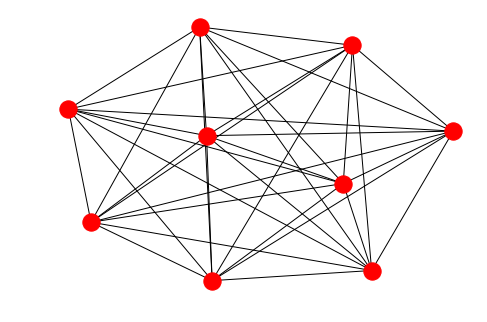

In [111]:
import requests
data=requests.get(distance_url).json()
all_rows = data['resourceSets'][0]['resources'][0]['results']
address_graph=nx.Graph()
address_graph.add_nodes_from(addresses)
for i in range(len(all_rows)):
    origin_index = all_rows[i]['originIndex']
    origin = addresses[origin_index]
    destination_index = all_rows[i]['destinationIndex']
    destination = addresses[destination_index]
    duration = all_rows[i]['travelDuration']
    if origin != destination:
        address_graph.add_edge(origin,destination,d=duration)
nx.draw(address_graph)

<h4>Functionalize this for reuse</h4>

In [112]:
def get_route_graph(address_list,mode='walking'):
    latlons=''
    for address in addresses:
        latlon=get_lat_lon(address)
        latlons += latlon + ';'
        
    distance_url = 'https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix?origins='
    distance_url+=latlons[:-1]
    distance_url+='&destinations='
    distance_url+=latlons[:-1]
    #Set the mode walking, driving, cycling
    distance_url+='&travelMode='+mode + "&key=" + my_api_key   
    
    data=requests.get(distance_url).json()
    all_rows = data['resourceSets'][0]['resources'][0]['results']
    address_graph=nx.Graph()
    address_graph.add_nodes_from(addresses)
    for i in range(len(all_rows)):
        origin_index = all_rows[i]['originIndex']
        origin = addresses[origin_index]
        destination_index = all_rows[i]['destinationIndex']
        destination = addresses[destination_index]
        duration = all_rows[i]['travelDuration']
        if origin != destination:
            address_graph.add_edge(origin,destination,d=duration)
    
    return address_graph

address_graph = get_route_graph(addresses)

<h4>Test the function by drawing it with node and edge labels</h4>

In [113]:
for edge in address_graph.edges():
    print(edge,address_graph.get_edge_data(*edge))

('Columbia University, New York, NY', 'Amity Hall Uptown, Amsterdam Avenue, New York, NY') {'d': 3.685}
('Columbia University, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY') {'d': 5732.632}
('Columbia University, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY') {'d': 42.665}
('Columbia University, New York, NY', "Grant's Tomb, West 122nd Street, New York, NY") {'d': 139.088}
('Columbia University, New York, NY', 'Pisticci, La Salle Street, New York, NY') {'d': 13.028}
('Columbia University, New York, NY', 'Nicholas Roerich Museum, West 107th Street, New York, NY') {'d': 139.088}
('Columbia University, New York, NY', 'Audubon Terrace, Broadway, New York, NY') {'d': 139.088}
('Columbia University, New York, NY', 'Apollo Theater, New York, NY') {'d': 18.925}
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY') {'d': 5734.965}
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue,

In [114]:
for n in address_graph.edges:
    print(n)

('Columbia University, New York, NY', 'Amity Hall Uptown, Amsterdam Avenue, New York, NY')
('Columbia University, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY')
('Columbia University, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY')
('Columbia University, New York, NY', "Grant's Tomb, West 122nd Street, New York, NY")
('Columbia University, New York, NY', 'Pisticci, La Salle Street, New York, NY')
('Columbia University, New York, NY', 'Nicholas Roerich Museum, West 107th Street, New York, NY')
('Columbia University, New York, NY', 'Audubon Terrace, Broadway, New York, NY')
('Columbia University, New York, NY', 'Apollo Theater, New York, NY')
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY')
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY')
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', "Grant's Tomb, West 122nd Street, New York, NY")
('Amity Hall 

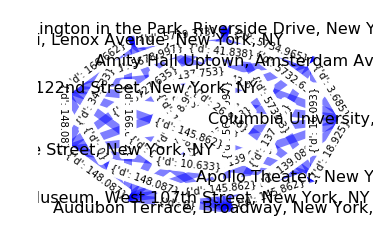

In [115]:
address_graph = get_route_graph(addresses)
pos=nx.circular_layout(address_graph) # positions for all nodes

# nodes
nx.draw_networkx_nodes(address_graph,pos,
                       node_color='r',
                       node_size=2000,
                      alpha=0.001)

# edges

nx.draw_networkx_edges(address_graph,pos,edgelist=address_graph.edges(),width=8,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(address_graph,pos,font_size=10)
node_name={}
for node in address_graph.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(address_graph,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display


<h3>Yikes! Unreadable!</h3>
<li>Let's see what the edge weights are</li>

In [116]:
for edge in address_graph.edges():
    print(edge,address_graph.get_edge_data(*edge))

('Columbia University, New York, NY', 'Amity Hall Uptown, Amsterdam Avenue, New York, NY') {'d': 3.685}
('Columbia University, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY') {'d': 5732.632}
('Columbia University, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY') {'d': 42.665}
('Columbia University, New York, NY', "Grant's Tomb, West 122nd Street, New York, NY") {'d': 139.088}
('Columbia University, New York, NY', 'Pisticci, La Salle Street, New York, NY') {'d': 13.028}
('Columbia University, New York, NY', 'Nicholas Roerich Museum, West 107th Street, New York, NY') {'d': 139.088}
('Columbia University, New York, NY', 'Audubon Terrace, Broadway, New York, NY') {'d': 139.088}
('Columbia University, New York, NY', 'Apollo Theater, New York, NY') {'d': 18.925}
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY') {'d': 5734.965}
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue,

<h4>Let's make this readable</h4>

In [117]:
for edge in address_graph.edges():
    duration = address_graph.get_edge_data(*edge)['d']
    address_graph.get_edge_data(*edge)['d'] = int(duration/60)
    print(address_graph.get_edge_data(*edge))

{'d': 0}
{'d': 95}
{'d': 0}
{'d': 2}
{'d': 0}
{'d': 2}
{'d': 2}
{'d': 0}
{'d': 95}
{'d': 0}
{'d': 2}
{'d': 0}
{'d': 2}
{'d': 2}
{'d': 0}
{'d': 95}
{'d': 94}
{'d': 95}
{'d': 94}
{'d': 94}
{'d': 95}
{'d': 2}
{'d': 0}
{'d': 2}
{'d': 2}
{'d': 0}
{'d': 2}
{'d': 0}
{'d': 0}
{'d': 2}
{'d': 2}
{'d': 2}
{'d': 0}
{'d': 0}
{'d': 2}
{'d': 2}


<h4>Now let's look a the graph</h4>

/Users/alexhuo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


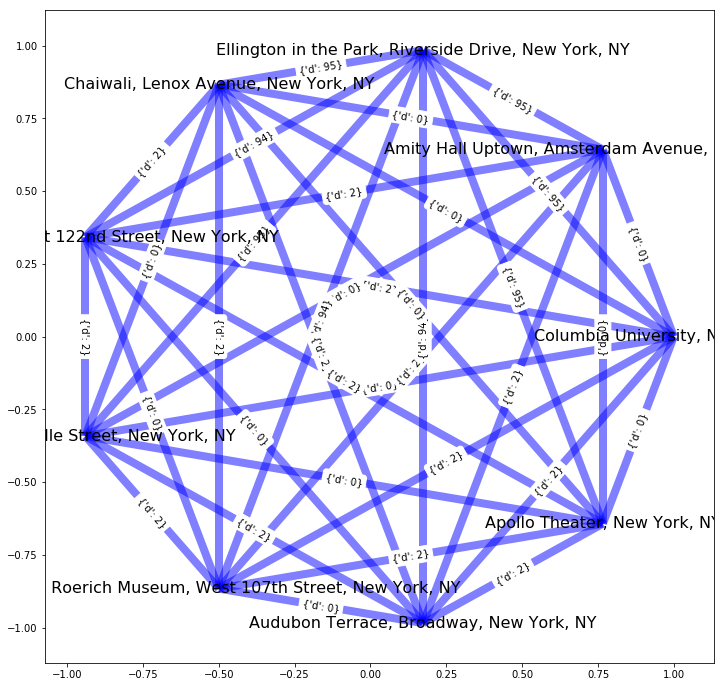

In [118]:
pos=nx.circular_layout(address_graph) # positions for all nodes
fig=plt.figure(1,figsize=(12,12)) #Let's draw a big graph so that it is clearer
# nodes
nx.draw_networkx_nodes(address_graph,pos,
                       node_color='r',
                       node_size=2000,
                      alpha=0.001)

# edges

nx.draw_networkx_edges(address_graph,pos,edgelist=address_graph.edges(),width=8,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(address_graph,pos,font_size=10)
node_name={}
for node in address_graph.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(address_graph,pos,node_name,font_size=16)
#fig.axis('off')
fig.show() # display

<h4>Let's remove a few edges (randomly)</h4>

In [94]:
for edge in address_graph.edges():
    import random
    r = random.random()
    if r <0.75: #get rid of 60% of the edges
        address_graph.remove_edge(*edge)


RuntimeError: dictionary changed size during iteration

<h4>And draw it again</h4>

/Users/alexhuo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


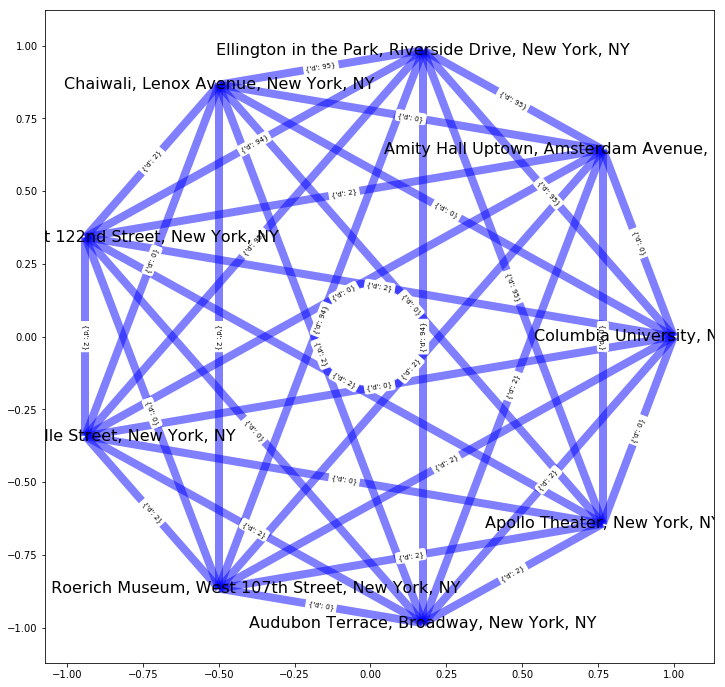

In [119]:
pos=nx.circular_layout(address_graph) # positions for all nodes
plt.figure(1,figsize=(12,12)) #Let's draw a big graph so that it is clearer
# nodes
nx.draw_networkx_nodes(address_graph,pos,
                       node_color='r',
                       node_size=2000,
                      alpha=0.001)

# edges

nx.draw_networkx_edges(address_graph,pos,edgelist=address_graph.edges(),width=8,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(address_graph,pos,font_size=7)
node_name={}
for node in address_graph.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(address_graph,pos,node_name,font_size=16)
#fig.axis('off')
fig.show() # display

In [120]:
print(addresses)

['Columbia University, New York, NY', 'Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY', "Grant's Tomb, West 122nd Street, New York, NY", 'Pisticci, La Salle Street, New York, NY', 'Nicholas Roerich Museum, West 107th Street, New York, NY', 'Audubon Terrace, Broadway, New York, NY', 'Apollo Theater, New York, NY']


<h4>Shortest path and shortest duration</h4>

In [121]:
print(nx.shortest_path(address_graph,'Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY'))
print(nx.dijkstra_path(address_graph,'Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY'))
print(nx.dijkstra_path_length (address_graph,'Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY',weight='d'))


['Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY']
['Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY']
0


In [122]:
#[print(n1,n2,nx.shortest_path_length(n1,n2),nx.dijkstra_path_length(n1,n2,weight='d')) for n1 in address_graph.nodes() for n2 in address_graph.nodes()]
[print(n1,n2,
       nx.shortest_path_length(address_graph,n1,n2),
       nx.dijkstra_path_length(address_graph,n1,n2,weight='d'),
      ) for n1 in address_graph.nodes() for n2 in address_graph.nodes() if not n1 == n2]

Columbia University, New York, NY Amity Hall Uptown, Amsterdam Avenue, New York, NY 1 0
Columbia University, New York, NY Ellington in the Park, Riverside Drive, New York, NY 1 95
Columbia University, New York, NY Chaiwali, Lenox Avenue, New York, NY 1 0
Columbia University, New York, NY Grant's Tomb, West 122nd Street, New York, NY 1 2
Columbia University, New York, NY Pisticci, La Salle Street, New York, NY 1 0
Columbia University, New York, NY Nicholas Roerich Museum, West 107th Street, New York, NY 1 2
Columbia University, New York, NY Audubon Terrace, Broadway, New York, NY 1 2
Columbia University, New York, NY Apollo Theater, New York, NY 1 0
Amity Hall Uptown, Amsterdam Avenue, New York, NY Columbia University, New York, NY 1 0
Amity Hall Uptown, Amsterdam Avenue, New York, NY Ellington in the Park, Riverside Drive, New York, NY 1 95
Amity Hall Uptown, Amsterdam Avenue, New York, NY Chaiwali, Lenox Avenue, New York, NY 1 0
Amity Hall Uptown, Amsterdam Avenue, New York, NY Grant'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [123]:
for edge in address_graph.edges():
    print(edge,address_graph.get_edge_data(*edge))

('Columbia University, New York, NY', 'Amity Hall Uptown, Amsterdam Avenue, New York, NY') {'d': 0}
('Columbia University, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY') {'d': 95}
('Columbia University, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY') {'d': 0}
('Columbia University, New York, NY', "Grant's Tomb, West 122nd Street, New York, NY") {'d': 2}
('Columbia University, New York, NY', 'Pisticci, La Salle Street, New York, NY') {'d': 0}
('Columbia University, New York, NY', 'Nicholas Roerich Museum, West 107th Street, New York, NY') {'d': 2}
('Columbia University, New York, NY', 'Audubon Terrace, Broadway, New York, NY') {'d': 2}
('Columbia University, New York, NY', 'Apollo Theater, New York, NY') {'d': 0}
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Ellington in the Park, Riverside Drive, New York, NY') {'d': 95}
('Amity Hall Uptown, Amsterdam Avenue, New York, NY', 'Chaiwali, Lenox Avenue, New York, NY') {'d': 0}
('Amity Hall Uptown, Ams

<h2>Graph drawing options</h2>
<li>nltk uses matplotlib to draw graphs
<li>limited, but useful, functionalities
<h3>Let's take a look!</h3>

<b>Differnetiating edges by weight</b>

/Users/alexhuo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


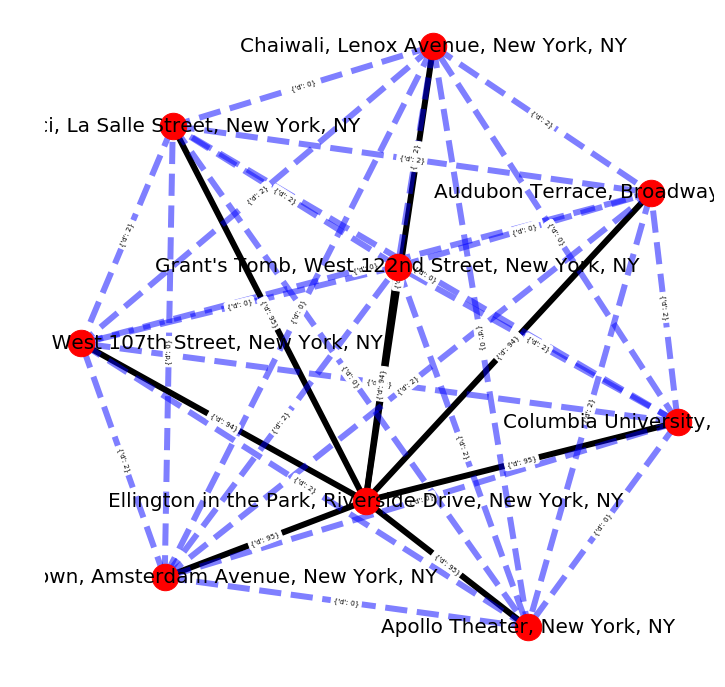

In [124]:
#Divide edges into two groups based on weight
#Easily extendable to n-groups

elarge=[(u,v) for (u,v,d) in address_graph.edges(data=True) if d['d'] >5]
esmall=[(u,v) for (u,v,d) in address_graph.edges(data=True) if d['d'] <=5]

pos=nx.spring_layout(address_graph) # positions for all nodes
plt.figure(1,figsize=(12,12)) #Let's draw a big graph so that it is clearer

# nodes
nx.draw_networkx_nodes(address_graph,pos,node_size=700)

# edges. draw the larger weight edges in solid lines and smaller weight edges in dashed lines
nx.draw_networkx_edges(address_graph,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(address_graph,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(address_graph,pos,font_size=20,font_family='sans-serif')

nx.draw_networkx_edge_labels(address_graph,pos,font_size=7)

plt.axis('off')
#plt.savefig("address_graph.png") # save as png if you need to use it in a report or web app
fig.show() # display



<h4>highlight the shortest path</h4>


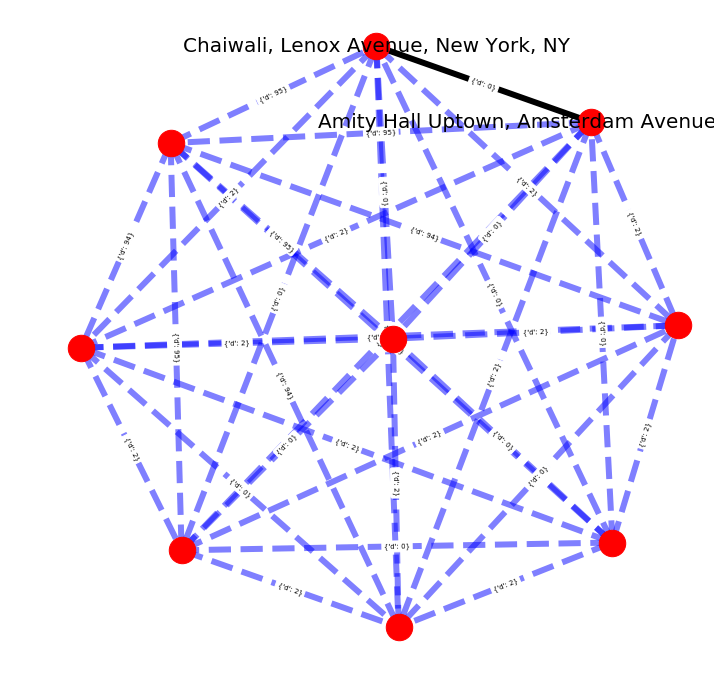

In [125]:
origin = 'Amity Hall Uptown, Amsterdam Avenue, New York, NY'
destination = 'Chaiwali, Lenox Avenue, New York, NY'
shortest_path = nx.dijkstra_path(address_graph,origin,destination)
shortest_path_edges = list()
for i in range(len(shortest_path)-1):
    shortest_path_edges.append((shortest_path[i],shortest_path[i+1]))
    shortest_path_edges.append((shortest_path[i+1],shortest_path[i]))
    
path_edges=list()
other_edges=list()
node_label_list = dict()
node_label_list = {n:'' for n in address_graph.nodes()}
for edge in address_graph.edges():
    if edge in shortest_path_edges:
        path_edges.append(edge)
        node_label_list[edge[0]] = edge[0]
        node_label_list[edge[1]] = edge[1]
    else:
        other_edges.append(edge)

pos=nx.spring_layout(address_graph) # positions for all nodes
fig=plt.figure(1,figsize=(12,12))
# nodes
nx.draw_networkx_nodes(address_graph,pos,node_size=700)

# edges. draw the larger weight edges in solid lines and smaller weight edges in dashed lines
nx.draw_networkx_edges(address_graph,pos,edgelist=path_edges,
                    width=6)
nx.draw_networkx_edges(address_graph,pos,edgelist=other_edges,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels

nx.draw_networkx_labels(address_graph,pos,font_size=20,font_family='sans-serif',labels=node_label_list)
nx.draw_networkx_edge_labels(address_graph,pos,font_size=7)

plt.axis('off')
#plt.savefig("address_graph.png") # save as png if you need to use it in a report or web app
plt.show() # display


<b>Question</b> How would you remove edge labels from all but the shortest path?

<h4>Working with a network</h4>


<b>Given an address, generate a <i>sorted by distance</i> list of all other addresses

In [126]:
location = 'Amity Hall Uptown, Amsterdam Avenue, New York, NY'
distance_list = list()
for node in address_graph.nodes():
    if node == location:
        continue
    distance = nx.dijkstra_path_length(address_graph,location,node)
    distance_list.append((node,distance))
from operator import itemgetter
print(sorted(distance_list,key=itemgetter(1)))

[('Columbia University, New York, NY', 1), ('Ellington in the Park, Riverside Drive, New York, NY', 1), ('Chaiwali, Lenox Avenue, New York, NY', 1), ("Grant's Tomb, West 122nd Street, New York, NY", 1), ('Pisticci, La Salle Street, New York, NY', 1), ('Nicholas Roerich Museum, West 107th Street, New York, NY', 1), ('Audubon Terrace, Broadway, New York, NY', 1), ('Apollo Theater, New York, NY', 1)]


<b>Get all paths from one location  to another</b>

In [127]:
list(nx.all_simple_paths(address_graph,'Amity Hall Uptown, Amsterdam Avenue, New York, NY','Chaiwali, Lenox Avenue, New York, NY'))

[['Amity Hall Uptown, Amsterdam Avenue, New York, NY',
  'Columbia University, New York, NY',
  'Ellington in the Park, Riverside Drive, New York, NY',
  'Chaiwali, Lenox Avenue, New York, NY'],
 ['Amity Hall Uptown, Amsterdam Avenue, New York, NY',
  'Columbia University, New York, NY',
  'Ellington in the Park, Riverside Drive, New York, NY',
  "Grant's Tomb, West 122nd Street, New York, NY",
  'Chaiwali, Lenox Avenue, New York, NY'],
 ['Amity Hall Uptown, Amsterdam Avenue, New York, NY',
  'Columbia University, New York, NY',
  'Ellington in the Park, Riverside Drive, New York, NY',
  "Grant's Tomb, West 122nd Street, New York, NY",
  'Pisticci, La Salle Street, New York, NY',
  'Chaiwali, Lenox Avenue, New York, NY'],
 ['Amity Hall Uptown, Amsterdam Avenue, New York, NY',
  'Columbia University, New York, NY',
  'Ellington in the Park, Riverside Drive, New York, NY',
  "Grant's Tomb, West 122nd Street, New York, NY",
  'Pisticci, La Salle Street, New York, NY',
  'Nicholas Roerich 

In [128]:
nx.all_simple_paths(address_graph,
                    'Amity Hall Uptown, Amsterdam Avenue, New York, NY',
                    'Chaiwali, Lenox Avenue, New York, NY')

<generator object _all_simple_paths_graph at 0x151b08a468>

<h2>Social networks</h2><br>
We will use the <a href="https://www.yelp.com/dataset_challenge">Yelp database challenge</a><br>
Data on:
    users,
    businesses,
    reviews,
    tips (try the mushroom burger!),
    check-in (special offers from yelp)

<h3>We're use the data in the users file (yelp_academic_dataset_user.json)</h3>

<h4>Read the data from the data file and create several list variables to hold the data</h4>
<li>You could also use objects to store the data </li>

In [ ]:
import json
import datetime
datafile='yelp_academic_dataset_user.json'
user_id_count = 1
user_id_dict = dict()
with open(datafile,'r') as f:
    for line in f:
        data = json.loads(line)
        user_id = data.get('user_id')
        friends = data.get('friends')
        try:
            user_id_dict[user_id]
        except:
            user_id_dict[user_id] = user_id_count
            user_id_count+=1

user_data=list()
friends_data=list()
with open(datafile,'r') as f:
    count=0
    for line in f:
        data=json.loads(line)
        user_id=user_id_dict[data.get('user_id')]
        name=data.get('name')
        review_count=data.get('review_count')
        average_stars=data.get('average_stars') 
        yelping_since=datetime.datetime.strptime(data.get('yelping_since'),"%Y-%m").date()
        fans=data.get('fans')
        user_friends=data.get('friends')
        for i in range(len(user_friends)):
            user_friends[i] = user_id_dict[user_friends[i]]
        user_data.append([user_id,name,review_count,average_stars,yelping_since,fans])
        friends_data.append([user_id,user_friends])
        count+=1
print(count)


In [ ]:
friends_data[0:10]

<h2>Too much data for this class so let's cut it down</h2>

In [ ]:
#Select a random(ish) list of nodes 
friends_of_list = [1,5,15,100,2200,3700,13500,23800,45901,78643,112112,198034,267123,298078,301200,353216]
node_super_set = set(friends_of_list)
#Get a superset of these nodes - the friends they are connected to
for n in friends_of_list:
    friends = friends_data[n-1][1]
    node_super_set = node_super_set.union({f for f in friends})
node_super_list = list(node_super_set)
#Collect node data and edges for these nodes
node_data = dict()
edge_list = list()
for node in node_super_list:
    node_data[node]=user_data[node-1]
    friends = friends_data[node-1][1]
    edges = [(node,e) for e in friends if e in node_super_list]
    edge_list.extend(edges)

In [ ]:
print(len(edge_list),len(node_super_list),len(node_data))


In [ ]:
for e in edge_list:
    if e[0] in node_super_list:
        continue
    if e[1] in node_super_list:
        continue
    print(e[0],e[1])

<h3>Make the graph</h3>

In [ ]:
import networkx as nx

In [ ]:
friend_graph=nx.Graph()
friend_graph.add_nodes_from(node_super_list)
friend_graph.add_edges_from(edge_list)
print(friend_graph.number_of_nodes(),friend_graph.number_of_edges())

In [ ]:
#Querying the graph
len(friend_graph.neighbors(1))

In [ ]:
nx.draw(friend_graph)

<h4>Let's remove disconnected nodes</h4>


In [ ]:
count = 0
for n in friend_graph.nodes_iter():
    if friend_graph.degree(n) == 1:
        print(n)

In [ ]:
nodes = friend_graph.nodes()
for node in nodes:
    if friend_graph.degree(node) == 0:
        friend_graph.remove_node(node)

In [ ]:
pos=nx.spring_layout(friend_graph) # positions for all nodes
fig = plt.figure(1,figsize=(12,12))
#pos
# nodes
nx.draw_networkx_nodes(friend_graph,pos,
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(friend_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(friend_graph,pos,
                       width=8,alpha=0.5,edge_color='b')

node_name={}
for node in friend_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(friend_graph,pos,node_name,font_size=16)

fig.show()

<h3>Start looking at different aspects of the graph</h3>

In [ ]:
nx.shortest_path(friend_graph,100219,19671)

In [ ]:
nx.shortest_path_length(friend_graph,167099,47622)

<h3>Graph components</h3>

<li>Let's see the number of connected components
<li>And then each connected component

In [ ]:
print(len(list(nx.connected_components(friend_graph))))

In [ ]:
for comp in nx.connected_components(friend_graph):
    print(comp)

<h4>Largest connected component subgraph</h4>

In [ ]:
largest_size=0
largest_graph = None
for g in nx.connected_component_subgraphs(friend_graph):
    if len(g) > largest_size:
        largest_size = len(g)
        largest_graph = g
nx.draw(largest_graph)

<h4>Smallest connected component</h4>

In [ ]:
smallest_size=100000
smallest_graph = None
for g in nx.connected_component_subgraphs(friend_graph):
    if len(g) < smallest_size:
        smallest_size = len(g)
        smallest_graph = g
nx.draw(smallest_graph)

In [ ]:
#Find out node degrees in the graph
nx.degree(friend_graph)

<h4>Max degree. The yelp user with the most friends</h4>

In [ ]:
#Highest degree
print(max(nx.degree(friend_graph).values()))


#Node with highest degree value
degrees = nx.degree(friend_graph)
print(max(degrees,key=degrees.get))


<h2>Network analysis algorithms</h2>
https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html

<h3>Clustering</h3>
Clustering is a measure of how closely knit the nodes in a graph are. We can measure the degree to which a node belongs to a cluster and the degree to which the graph is clustered
- Node clustering coefficient: A measure that shows the degree to which a node belongs to a cluster
- Graph clustering coefficient: A measure that shows the degree to which a graph is clustered

In [ ]:
pos=nx.spring_layout(friend_graph) # positions for all nodes
fig = plt.figure(1,figsize=(12,12))
#pos
# nodes
nx.draw_networkx_nodes(friend_graph,pos,
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(friend_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(friend_graph,pos,
                       edgelist=edges,
                       width=8,alpha=0.5,edge_color='b')

node_name={}
for node in friend_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(friend_graph,pos,node_name,font_size=16)

fig.show()

In [ ]:
nx.clustering(friend_graph)

In [ ]:
nx.average_clustering(friend_graph)

In [ ]:
G=nx.complete_graph(4)
nx.draw(G)


In [ ]:
nx.clustering(G)

In [ ]:
G.remove_edge(1,2)

In [ ]:
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [ ]:
nx.clustering(G)

<h3>Node 0 has two neighbors: 1 and 2. Of the three possible edges, only two are actually present. So, its clustering coefficient is 2/3 or 0.667</h3>

<h2>Centrality and communicability</h2>
<b>Centrality</b> deals with identifying the most important nodes in a graph<p>
<b>Communicability</b> measures how easy it is to send a message from node i to node j
<li>closeness_centrality: (n-1)/sum(shortest path to all other nodes)
<li>betweenness_centrality: fraction of pair shortest paths that pass through node n
<li>degree centrality: fraction of nodes that n is connected to
<li>communicability: the sum of all walks from one node to every other node

In [ ]:
from networkx.algorithms.centrality import closeness_centrality, communicability

<h3>Closeness centrality is a measure of how near a node is to every other node in a network</h3>
<h3>The higher the closeness centrality, the more central a node is</h3>
<h3>Roughly, because it can get to more nodes in shorter jumps</h3>

In [ ]:
type(closeness_centrality(friend_graph))

In [ ]:
from collections import OrderedDict
cc = OrderedDict(sorted(
                    closeness_centrality(friend_graph).items(),
                    key = lambda x: x[1],
                    reverse = True))
cc

<h3>Understanding closeness centrality</h3>

In [ ]:
G=nx.complete_graph(4)
nx.closeness_centrality(G)

In [ ]:
G.remove_edge(1,2)


In [ ]:
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [ ]:
nx.closeness_centrality(G)

<li>n=4
<li>shortest paths from 2 (2-0:1, 2-3:1, 2-1:2) 
<li> (n-1)/sum = 3/4 = 0.75

<h2>Communicability</h2>
A measure of the degree to which one node can communicate with another<p>
Takes into account all paths between pairs of nodes<p>
The more paths, the higher the communicability

In [ ]:
G = nx.Graph([(0,1),(1,2),(1,5),(5,4),(2,4),(2,3),(4,3),(3,6)])
nx.communicability(G)

In [ ]:
#Define a layout for the graph
pos=nx.spring_layout(G) # positions for all nodes

# draw the nodes: red, sized, transperancy
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                      alpha=1)

# draw the edges
nx.draw_networkx_edges(G,pos,
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [ ]:
# communicability is the sum of closed walks of different lengths between nodes.
#communicability(friend_graph) #Costly operation, we won't do this. Try it at home!

<h2>Betweenness centrality</h2>
<h3>measures of the extent to which a node is connected to other nodes that are not connected to each other. </h3> 
<h3>It’s a measure of the degree to which a node serves as a connector</h3>
<h3>Example: a traffic bottleneck</h3>


<h4>The number of shortest paths that go through node n/total number of shortest paths</h4>

In [ ]:
G=nx.complete_graph(4)
nx.betweenness_centrality(G)

<h3>When the graph is fully connected, no shortest paths go through the node. So the numerator is zero</h3>

In [ ]:
G.remove_edge(1,2)
nx.betweenness_centrality(G)

In [ ]:
#Define a layout for the graph
pos=nx.spring_layout(G) # positions for all nodes

# draw the nodes: red, sized, transperancy
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                      alpha=1)

# draw the edges
nx.draw_networkx_edges(G,pos,
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [ ]:
nx.all_pairs_shortest_path(G)

<h3>There are 12 shortest paths in total</h3>
<h3>Two go through 0 (1, 0, 2) and (2, 0, 1)</h3>
<h3> Betweeness centrality: 2/12</h3>

In [ ]:
nx.betweenness_centrality(friend_graph)

<h3>Dispersion in fully connected graphs</h3>
<li>Eccentricity: the max distance from one node to all other nodes (least eccentric is more central)
<li>diameter: the max eccentricity of all nodes in a graph (the longest shortest path)
<li>periphery: the set of nodes with eccentricity = diameter

In [ ]:
G = nx.complete_graph(4)
nx.eccentricity(G)

In [ ]:
G.remove_edge(1,2)
nx.eccentricity(G)

<h2>Diameter</h2>
The longest shortest path in the graph
<h2>Periphery</h2>
The nodes with the longest shortest paths (the peripheral nodes)

In [ ]:
nx.diameter(G)

In [ ]:
nx.periphery(G)

In [ ]:
nx.diameter(friend_graph)

In [ ]:
nx.periphery(griend_graph)

In [ ]:
G = nx.complete_graph(4)
print(nx.diameter(G))
print(nx.periphery(G))

In [ ]:
G.remove_edge(1,2)
print(nx.diameter(G))
print(nx.periphery(G))

<h3>Cliques</h3>
A clique is a subgraph in which every node is connected to every other node

In [ ]:
from networkx.algorithms.clique import find_cliques, cliques_containing_node

In [ ]:
for clique in find_cliques(friend_graph):
    print(clique)

In [ ]:
cliques_containing_node(friend_graph,2)

In [ ]:
#nx.draw(nx.make_max_clique_graph(friend_graph))

<h3>Center: The set of nodes that are the most central (they have the smallest distance to any other node)</h3>
Graph must be fully connected

In [ ]:

from networkx.algorithms.distance_measures import center
center(largest_graph)